In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet

In [25]:
air_passenger_data = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [26]:
air_passenger_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


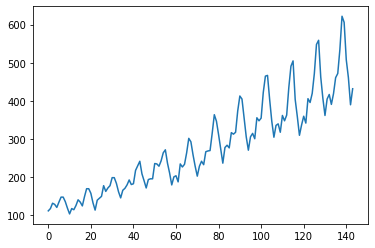

In [27]:
air_passenger_data['#Passengers'].plot()

In [28]:
#Prophet library expects certain named columns so rename
air_passenger_data.rename(columns={"Month": 'ds', '#Passengers': 'y'}, inplace=True)

# Additive

In [29]:
my_model = Prophet(interval_width=0.95)
my_model.fit(air_passenger_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# adding 36 months future dates 
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [31]:
forecast = my_model.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,1963-08-01,582.114534,606.228179,689.380657,577.836843,586.918107,67.401053,67.401053,67.401053,67.401053,67.401053,67.401053,0.0,0.0,0.0,649.515587
176,1963-09-01,585.228477,557.383269,649.572934,580.790515,590.330909,16.790416,16.790416,16.790416,16.790416,16.790416,16.790416,0.0,0.0,0.0,602.018893
177,1963-10-01,588.241970,522.203568,609.657908,583.650840,593.409285,-22.251148,-22.251148,-22.251148,-22.251148,-22.251148,-22.251148,0.0,0.0,0.0,565.990822
178,1963-11-01,591.355913,490.697887,578.387419,586.589501,596.588593,-57.324894,-57.324894,-57.324894,-57.324894,-57.324894,-57.324894,0.0,0.0,0.0,534.031018
179,1963-12-01,594.369406,517.358399,605.161562,589.355464,599.807338,-30.749146,-30.749146,-30.749146,-30.749146,-30.749146,-30.749146,0.0,0.0,0.0,563.620260


In [32]:
#yhat is the the predicted value and lower/upper is the prediected range
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.515587,606.228179,689.380657
176,1963-09-01,602.018893,557.383269,649.572934
177,1963-10-01,565.990822,522.203568,609.657908
178,1963-11-01,534.031018,490.697887,578.387419
179,1963-12-01,563.620260,517.358399,605.161562


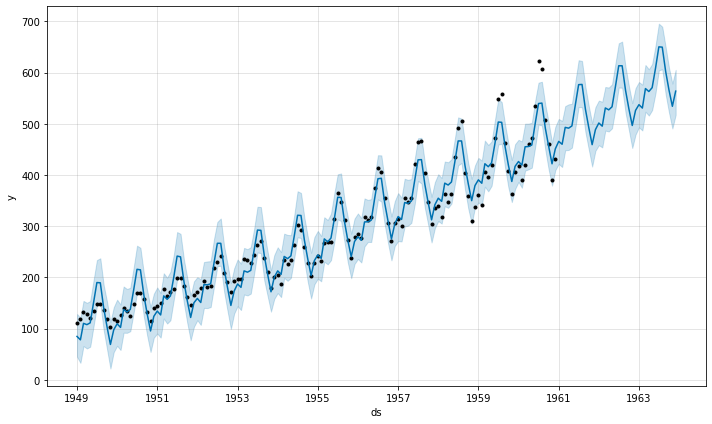

In [33]:
my_model.plot(forecast, uncertainty=True);
#black dots are actual, blue line is from model

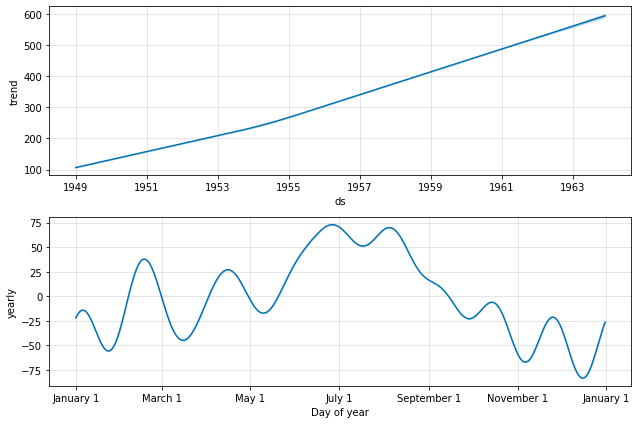

In [34]:
my_model.plot_components(forecast);

# Mutliplicative

In [35]:
my_model_multi = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
my_model_multi.fit(air_passenger_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
forecast_multi = my_model_multi.predict(future_dates)
forecast_multi.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
175,1963-08-01,605.857757,736.477311,795.899744,587.097359,624.426605,0.264786,0.264786,0.264786,0.264786,0.264786,0.264786,0.0,0.0,0.0,766.280129
176,1963-09-01,609.467317,620.018150,674.974522,590.032780,628.862134,0.062386,0.062386,0.062386,0.062386,0.062386,0.062386,0.0,0.0,0.0,647.489378
177,1963-10-01,612.960440,534.580001,587.043604,592.909190,633.137937,-0.083128,-0.083128,-0.083128,-0.083128,-0.083128,-0.083128,0.0,0.0,0.0,562.006143
178,1963-11-01,616.570000,465.335532,516.885844,595.872661,637.771793,-0.203568,-0.203568,-0.203568,-0.203568,-0.203568,-0.203568,0.0,0.0,0.0,491.056201
179,1963-12-01,620.063123,520.788357,576.603527,598.757757,642.337782,-0.113259,-0.113259,-0.113259,-0.113259,-0.113259,-0.113259,0.0,0.0,0.0,549.835547


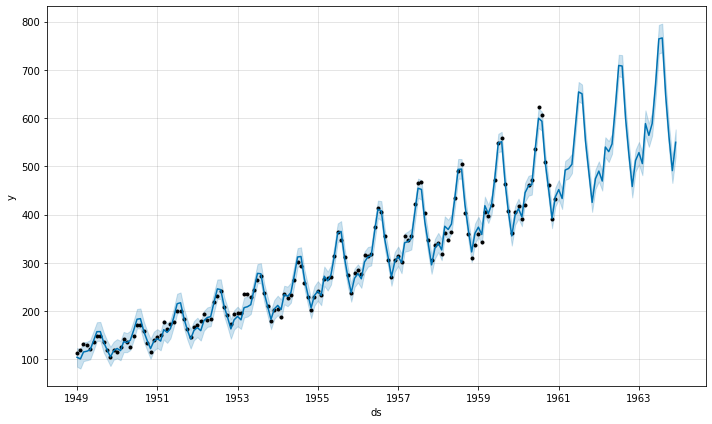

In [37]:
# better fit
my_model_multi.plot(forecast_multi, uncertainty=True);